In [6]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("lahman2016.sqlite")

In [7]:
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == "Y";
'''
Teams = conn.execute(query).fetchall()
teams_df = pd.DataFrame(Teams)
print(Teams[0])
print(teams_df.head())

(1961, 'AL', 'LAA', 'ANA', None, 8, 162, 82, 70, 91, None, None, 'N', 'N', 744, 5424, 1331, 218, 22, 189, 681, 1068, 37, 28, None, None, 784, 689, 4.31, 25, 5, 34, 4314, 1391, 180, 713, 973, 192, 154, 0.969, 'Los Angeles Angels', 'Wrigley Field (LA)', 603510, 111, 112, 'LAA', 'LAA', 'LAA', 'ANA', 'Los Angeles Angels of Anaheim', 'Y', None)
     0   1    2    3     4   5    6     7   8   9   ...        42   43   44  \
0  1961  AL  LAA  ANA  None   8  162  82.0  70  91  ...    603510  111  112   
1  1962  AL  LAA  ANA  None   3  162  81.0  86  76  ...   1144063   97   97   
2  1963  AL  LAA  ANA  None   9  161  81.0  70  91  ...    821015   94   94   
3  1964  AL  LAA  ANA  None   5  162  81.0  82  80  ...    760439   90   90   
4  1965  AL  CAL  ANA  None   7  162  80.0  75  87  ...    566727   97   98   

    45   46   47   48                             49  50    51  
0  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
1  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim 

In [8]:
print(len(teams_df))

2287


In [9]:
cols = ["yearID","lgID","teamID","franchID","divID","Rank","G","Ghome","W","L","DivWin","WCWin","LgWin","WSWin","R","AB","H","2B","3B","HR","BB","SO","SB","CS","HBP","SF","RA","ER","ERA","CG","SHO","SV","IPouts","HA","HRA","BBA",
"SOA","E","DP","FP","name","park","attendance","BPF","PPF","teamIDBR","teamIDlahman45","teamIDretro ","franchID","franchName","active","NAassoc "
]
teams_df.columns = cols
print(teams_df.head())

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L    ...     \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91    ...      
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76    ...      
2    1963   AL    LAA       ANA  None     9  161   81.0  70  91    ...      
3    1964   AL    LAA       ANA  None     5  162   81.0  82  80    ...      
4    1965   AL    CAL       ANA  None     7  162   80.0  75  87    ...      

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro   franchID  \
0     603510  111  112      LAA             LAA           LAA       ANA   
1    1144063   97   97      LAA             LAA           LAA       ANA   
2     821015   94   94      LAA             LAA           LAA       ANA   
3     760439   90   90      LAA             LAA           LAA       ANA   
4     566727   97   98      CAL             CAL           CAL       ANA   

                      franchName  active  NAassoc   
0  Los Angeles Angels of Anaheim 

In [10]:
df = teams_df[["yearID","teamID","G","W","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP"]]
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [11]:
df = df.dropna()
print(len(df))

2155


(array([  12.,   30.,  102.,  251.,  407.,  478.,  485.,  305.,   76.,    9.]),
 array([  36.,   44.,   52.,   60.,   68.,   76.,   84.,   92.,  100.,
         108.,  116.]),
 <a list of 10 Patch objects>)

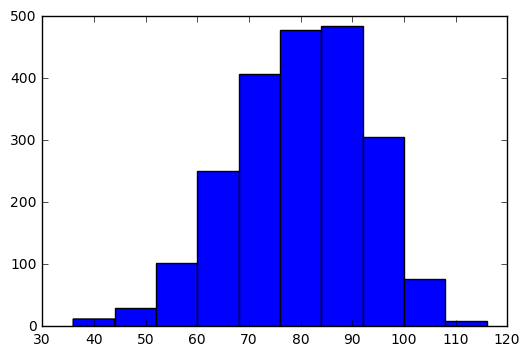

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df["W"])

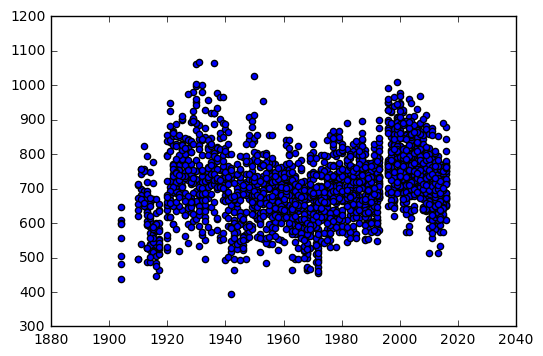

In [13]:
plt.scatter(df["yearID"], df["R"])

In [14]:
# Creating "year_label" column, which will give our algorithm information about how certain years are related (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
    
df["year_label"] = df["yearID"].apply(assign_label)
dummy_df = pd.get_dummies(df["year_label"], prefix="era")
df = pd.concat([df, dummy_df], axis=1)

In [15]:
def assign_decade(year):
    if year < 1910:
        return 1900
    elif year >= 1910 and year <= 1919:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df["decade_label"] = df["yearID"].apply(assign_decade)
decade_df = pd.get_dummies(df["decade_label"], prefix="decade")
df = pd.concat([df, decade_df], axis=1)

In [16]:
df = df.drop(["yearID","year_label","decade_label"], axis=1)

In [17]:
df.corr()["W"]

G              0.175290
W              1.000000
R              0.546920
AB             0.241826
H              0.375041
2B             0.247693
3B             0.013477
HR             0.330950
BB             0.345770
SO             0.076779
SB             0.145135
RA            -0.542450
ER            -0.429743
ERA           -0.481040
CG            -0.016828
SHO            0.445153
SV             0.396865
IPouts         0.323082
HA            -0.420675
HRA           -0.014112
BBA           -0.316782
SOA            0.256368
E             -0.311278
DP            -0.017307
FP             0.327276
era_1         -0.055461
era_2         -0.093346
era_3         -0.036990
era_4         -0.060099
era_5          0.039036
era_6          0.055548
era_7          0.063131
era_8          0.041452
decade_1900   -0.016217
decade_1910   -0.052841
decade_1920   -0.061731
decade_1930   -0.058700
decade_1940   -0.056522
decade_1950   -0.053655
decade_1960    0.025944
decade_1970    0.030786
decade_1980    0

In [18]:
numeric_cols = ["G","W","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP","era_1","era_2","era_3","era_4","era_5","era_6","era_7","era_8",
"decade_1900", "decade_1910","decade_1920","decade_1930","decade_1940","decade_1950","decade_1960","decade_1970","decade_1980",
"decade_1990","decade_2000","decade_2010"]

In [19]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
distances = kmeans_model.fit_transform(df[numeric_cols])

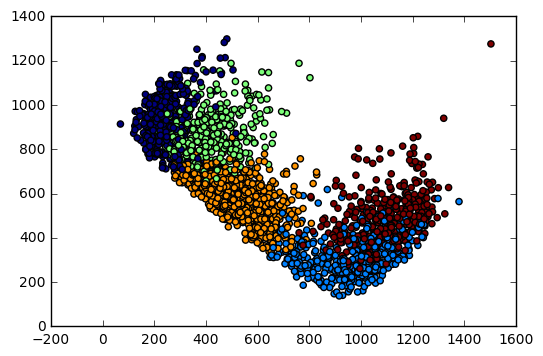

In [20]:
labels = kmeans_model.labels_
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import mean_absolute_error

In [32]:
from sklearn.cross_validation import KFold
lm = LinearRegression()
kf = KFold(len(df), 5, shuffle=True, random_state=8)

In [33]:
attributes = ["G","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP","era_1","era_2","era_3","era_4","era_5","era_6","era_7","era_8",
"decade_1900", "decade_1910","decade_1920","decade_1930","decade_1940","decade_1950","decade_1960","decade_1970","decade_1980",
"decade_1990","decade_2000","decade_2010"]

In [35]:
predictions = cross_val_predict(lm, df[attributes], df["W"], cv=kf)


In [38]:
from sklearn.cross_validation import cross_val_score
mae = cross_val_score(lm, df[attributes], df["W"], scoring='mean_absolute_error')
print(mae)

[-2.72581814 -2.72535156 -2.73785982]


In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
maedtr = cross_val_score(dtr, df[attributes], df["W"], scoring='mean_absolute_error')
print(maedtr)

[-5.12934631 -4.80779944 -4.86211699]
